# Final Project - Introduction to Machine Learning
---


## Dataset Description
---

**Description**
- The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`Gender`|`str`|Gender|
|`Age`|`float`|Age|
|`Height`|`float`|Hight|
|`Weight`|`float`|Weight|
|`family_history_with_overweight`|`str`|Has a family member suffered or suffers from overweight?|
|`FAVC`|`str`|Do you eat high caloric food frequently?|
|`FCVC`|`float`|Do you usually eat vegetables in your meals?|
|`NCP`|`float`|How many main meals do you have daily?|
|`CAEC`|`str`|Do you eat any food between meals?|
|`SMOKE`|`str`|Do you smoke?|
|`CH20`|`float`|How much water do you drink daily?|
|`SCC`|`str`|Do you monitor the calories you eat daily?|
|`FAF`|`float`|How often do you have physical activity?|
|`TUE`|`float`|How much time do you use technological devices such as cell phone, videogames, television, computer and others?|
|`CALC`|`str`|How often do you drink alcohol?|
|`MTRANS`|`str`|Which transportation do you usually use?|
|`NObeyesdad`| `str` | Obesity level (Insufficient, Normal, Overweight 1, Overweight 2, Obesity 1, Obesity 2, Obesity 3) , (**our target**)|

## Modeling Workflow
---

```
1. Data Preparation
2. Training a Machine Learning Models
3. Model Evaluation
```

### 1. Data Preparation
---

```
1.1. Load data and drop duplicates
1.2. Input-output Split
1.3. Train, test, valid Split
1.4. Perform EDA
1.5. Data Preprocessing
```

#### 1.1. Load data and drop duplicates
---

In [64]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
def read_data(fname):
   # read data
  df = pd.read_csv(fname, sep=',')
  print("Data shape raw               : ", df.shape, "- (#observasi, #kolom)")

  # drop duplicate
  # data_duplicated = df.duplicated(keep='last').sum()
  # print("Number of duplicate order id : ", data_duplicated)
  # df = df.drop_duplicates(keep='last')
  # print("Data shape after dropping    : ", df.shape, "- (#observasi, #kolom)")

  return df

In [66]:
filename = '/content/drive/MyDrive/Pacmann/Machine Learning/ObesityDataSet.csv'
data_backup = pd.read_csv(filename)

In [67]:
df = read_data(fname=filename)

Data shape raw               :  (2111, 17) - (#observasi, #kolom)


#### 1.2. Input-output Split
---

-  Ubah target ke bentuk numerik

In [68]:
def encode_and_order_weight_categories(data, column_name):
    category_to_value = {
        'Insufficient_Weight': 1,
        'Normal_Weight': 2,
        'Overweight_Level_I': 3,
        'Overweight_Level_II': 4,
        'Obesity_Type_I': 5,
        'Obesity_Type_II': 6,
        'Obesity_Type_III': 7
    }
    data[column_name] = data[column_name].map(category_to_value)

    return data

In [69]:
data = encode_and_order_weight_categories(df, 'NObeyesdad')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,3
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,4


In [70]:
def split_input_output(data, target_col):
  output_data = data[target_col]
  input_data = data.drop(target_col,
                         axis = 1)
  print("X shape: ", input_data.shape)
  print("y shape: ", output_data.shape)

  return input_data, output_data

In [71]:
X, y = split_input_output(data=data,
                          target_col='NObeyesdad')

X shape:  (2111, 16)
y shape:  (2111,)


In [72]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [73]:
y.head()

0    2
1    2
2    2
3    3
4    4
Name: NObeyesdad, dtype: int64

#### 1.3. Train, test, valid Split
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

-  Splitting proportion train (80%), valid (10%), and test (10%)

In [74]:
def split_train_test(X, y, test_size, seed):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = test_size,
                                                    random_state = seed)
  print("X train shape: ",X_train.shape)
  print("y train shape: ",y_train.shape)
  print("X test shape: ",X_test.shape)
  print("X test shape: ",y_test.shape)
  print("")
  return X_train, X_test, y_train, y_test

In [75]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X = X, y = y,
                                                              test_size = 0.2,
                                                              seed = 123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X = X_not_train, y = y_not_train,
                                                              test_size = 0.5,
                                                              seed = 123)

X train shape:  (1688, 16)
y train shape:  (1688,)
X test shape:  (423, 16)
X test shape:  (423,)

X train shape:  (211, 16)
y train shape:  (211,)
X test shape:  (212, 16)
X test shape:  (212,)



#### 1.4. Perform EDA
---

-  Check missing value

In [76]:
100 * (X_train.isna().sum(0) / len(X))

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
dtype: float64

In [77]:
def split_numerical_categorical(data, num_cols, cat_cols):
  numerical_data = data[num_cols]
  categorical_data = data[cat_cols]
  return numerical_data, categorical_data

In [78]:
all_col = X.columns
categorical_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE','SCC','CALC','MTRANS']
numerical_col = [i for i in all_col if i not in categorical_col]

# Split the data
X_num, X_cat = split_numerical_categorical(X_train, numerical_col, categorical_col)

**Plotting data numerik**

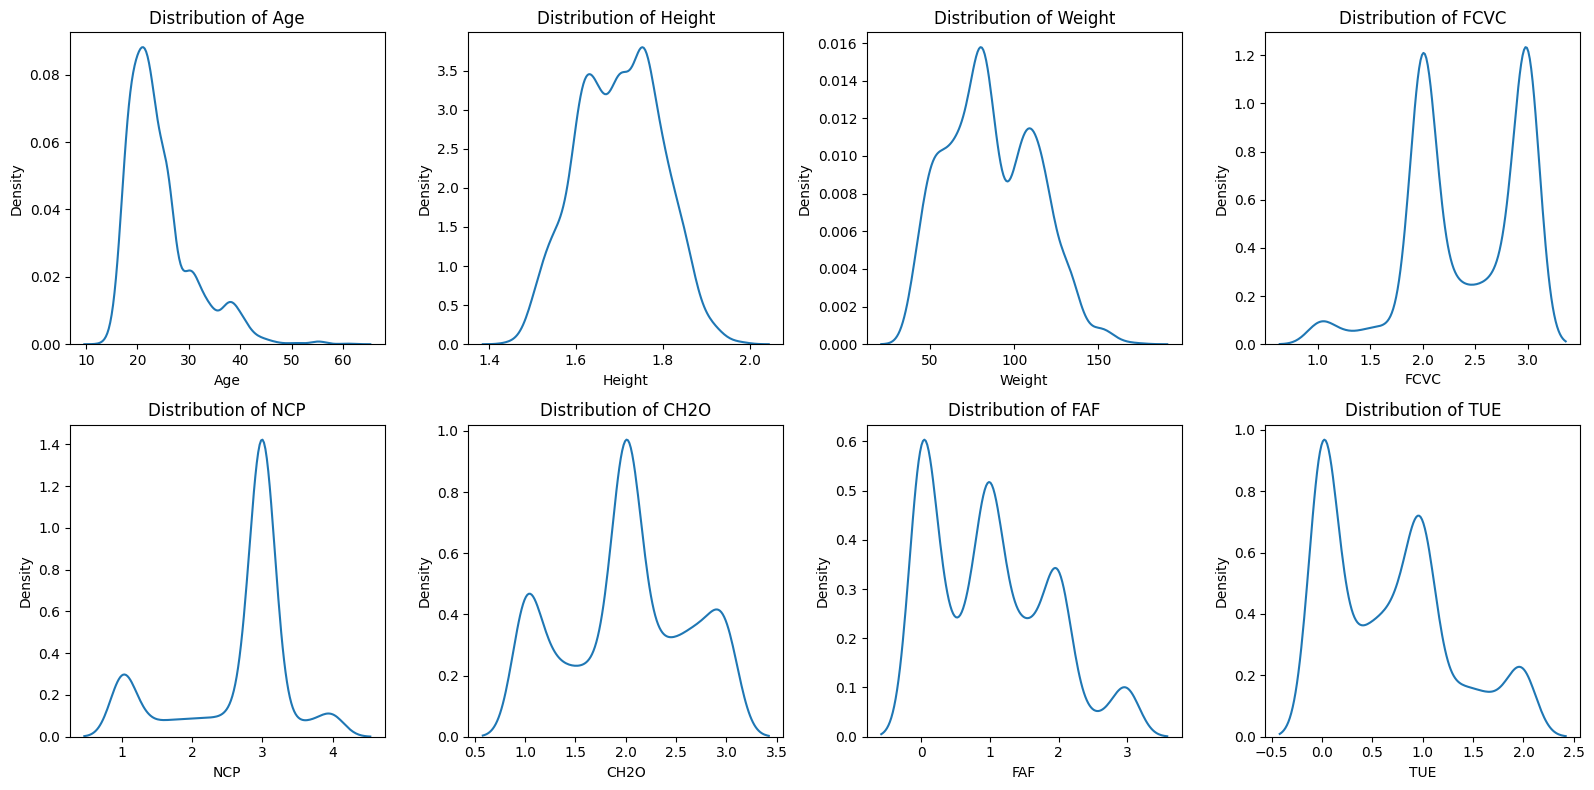

In [79]:
# Plot data numerik
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = ax.flatten()

for i, col in enumerate(X_num.columns):
    sns.kdeplot(X_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [80]:
X_num.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.353868,1.699912,86.589153,2.418001,2.666362,2.005905,1.008559,0.670816
std,6.379002,0.094748,26.224691,0.533392,0.786534,0.618406,0.854038,0.617895
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947666,1.625943,66.000000,2.000000,2.600776,1.549963,0.119642,0.000000
50%,22.809738,1.700000,82.977398,2.371916,3.000000,2.000000,1.000000,0.646355
75%,26.000000,1.767781,108.002262,3.000000,3.000000,2.474889,1.666534,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Summary:
  -  **Age**: variabel ini cenderung memiliki distribusi skew dan tidak memiliki nilai anomali.
  -  **Height**: variabel ini cenderung memiliki distribusi normal dan tidak memiliki nilai anomali.
  -  **Weight**: variabel ini cenderung memiliki distribusi skew dan tidak memiliki nilai anomali.
  -  **FCVC**: variabel ini cenderung memiliki distribusi skew dan tidak memiliki nilai anomali. Responden cenderung sering mengkonsumsi sayuran.
  -  **NCP**: variabel ini cenderung memiliki distribusi skew dan tidak memiliki nilai anomali. Responden cenderung makan besar (main meals) lebih teratur yaitu sebanyak 3 kali sehari.
  -  **CH2O**: variabel ini cenderung memiliki distibusi normal dan tidak memiliki nilai anomali. Responden rata rata sudah meminum air putih sesuai dengan anjuran yaitu 2 liter perhari
  -  **FAF**: melihat dari nilai median dan mean yang tidak jauh berbeda, variabel ini cenderung memiliki distribusi normal dan tidak memiliki nilai anomali. Responden cenderung kurang bergerak jika dilihat dari grafik yang menunjukkan bahwa hanya 1 sampai 2 hari saja.
  -  **TUE**: variabel ini cenderung memiliki distribusi skew dan tidak memiliki nilai anomali

**Check the features distribution of categorical column**

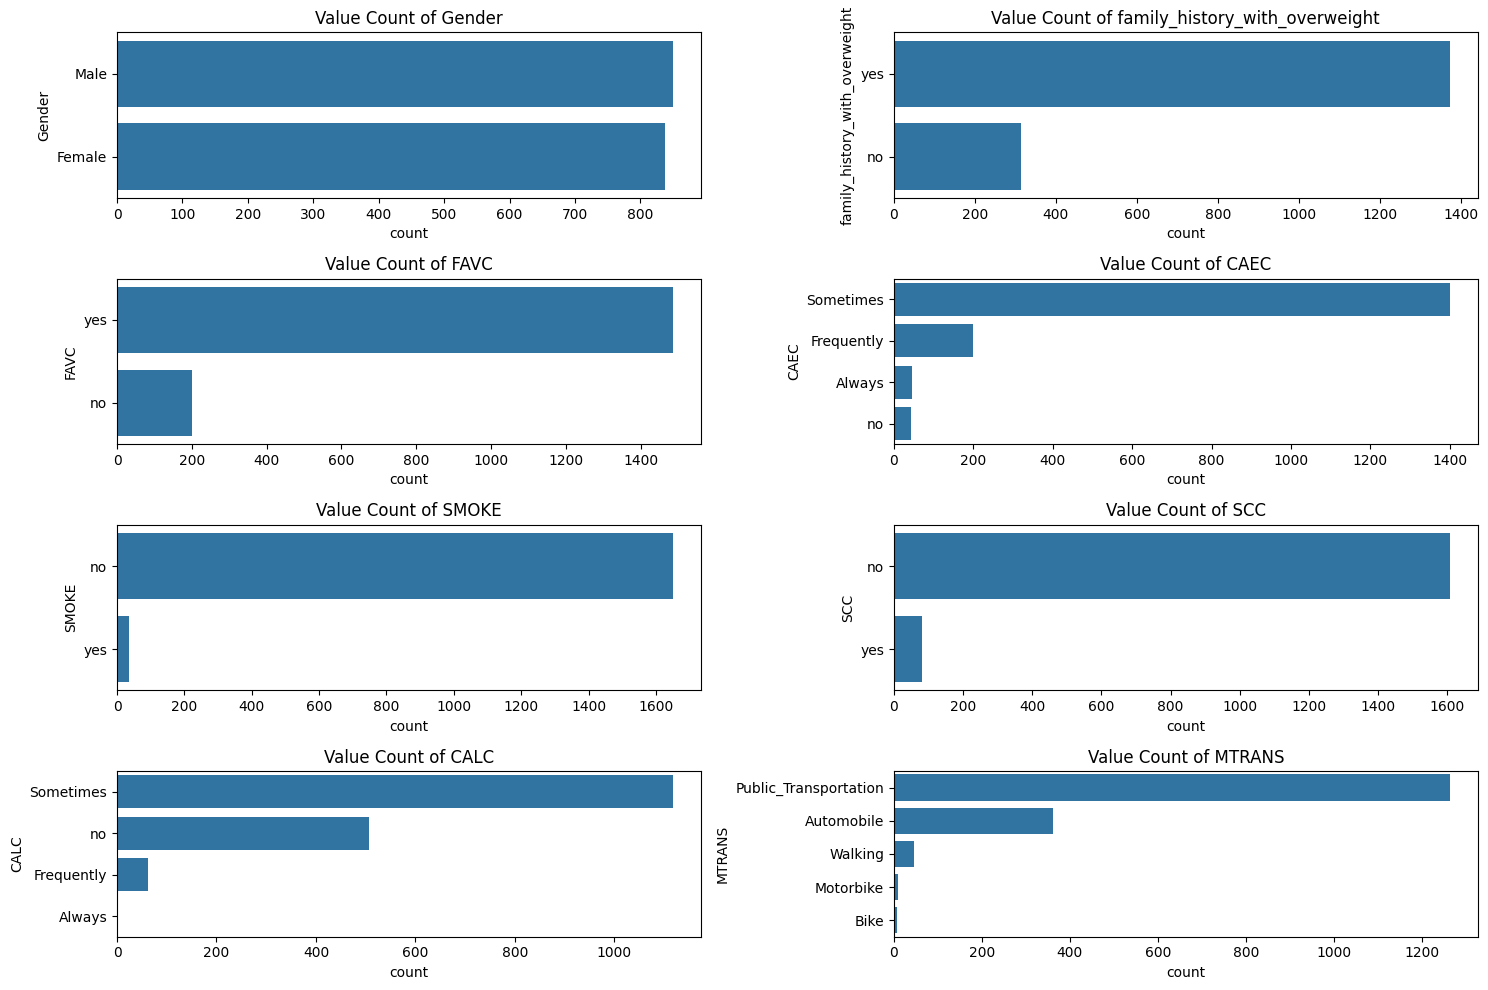

In [81]:
# Plot data categorical
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
axes = ax.flatten()

for i, col in enumerate(X_cat.columns):
    sns.countplot(X_cat[col], ax=axes[i], order = X_cat[col].value_counts().index)
    axes[i].set_title(f'Value Count of {col}')

plt.tight_layout()
plt.show()

Summary data kategorikal:
-  **Gender**: pria dan wanita memiliki proporsi yang cukup seimbang
-  **Family History With Overweight**: mayoritas responden memiliki riwayat obesitas dari keluarga mereka
-  **FAVC**: kebanyakan responden makan makanan yang tinggi kalori
-  **CAEC**: responden cenderung jarang mengkonsumsi snack ringan sebelum makan menu utama (meals)
-  **SMOKE**: proporsi responden yang tidak merokok lebih banyak dibandingkan yang merokok
- **SCC**: responden lebih banyak yang tidak melakukan monitoring terhadap kalori yang masuk dan keluar dari tubuh mereka
-  **CALC**: responden cenderung jarang mengkonsumsi alkohol
-  **MTRANS**: kebanyakan responden menggunakan public transportation untuk melakukan perjalanan dibandingkan menggunakan mobil, motor, jalan kaki, bahkan sepeda

**Tahapan preprocessing**
- Encoding categorical column
- Standardize column
- Feature Engineering

#### 1.5. Data Preprocesing
---

```
1.5.1. Encoding categorical column
1.5.2. Standardize column
```

##### 1.5.1. Encoding categorical column
---

In [82]:
ohe_cols = ['Gender', 'MTRANS']
label_cols = ['family_history_with_overweight', 'FAVC', 'CAEC','SMOKE','SCC','CALC']

-  One Hot Encoding untuk 'Gender' dan 'MTRANS'

In [83]:
def ohe_encoding(data):
  ohe_encoder = OneHotEncoder(sparse_output=False)
  ohe_encoder.fit(data)

  encoded_data = ohe_encoder.transform(data)
  categorical_columns = data.columns.tolist()
  ohe_data_encoded = pd.DataFrame(encoded_data, columns = ohe_encoder.get_feature_names_out(categorical_columns))
  ohe_data_encoded.index = data.index

  return ohe_data_encoded, ohe_encoder

In [84]:
X_ohe_encoded, ohe_encoder = ohe_encoding(data =  X_cat[ohe_cols])
X_ohe_encoded.head()

,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
591,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1131,1.0,0.0,0.0,0.0,0.0,1.0,0.0
395,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1035,0.0,1.0,0.0,0.0,0.0,1.0,0.0
148,1.0,0.0,1.0,0.0,0.0,0.0,0.0


-  Label Encoding untuk 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE','SCC','CALC'

In [85]:
def label_encoding(data, columns):
    le_data_encoded = data.copy()

    categories = {
    'family_history_with_overweight': ['no', 'yes'],
    'FAVC': ['no', 'yes'],
    'SMOKE': ['no', 'yes'],
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'SCC': ['no', 'yes'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always'],
    }

    for col in columns:
        le_encoder = LabelEncoder()
        le_encoder.fit(categories[col])
        le_data_encoded[col] = le_encoder.transform(le_data_encoded[col])

    return le_data_encoded, le_encoder

In [86]:
X_label_encoded, le_encoder = label_encoding(X_cat[label_cols], label_cols)
X_label_encoded.head()

,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC
591,1,1,2,0,0,3
1131,1,0,2,0,0,3
395,1,1,2,0,0,2
1035,1,1,2,0,0,2
148,0,1,0,0,0,2


-  Concat Numeric, Ohe, Label Encoding data

In [87]:
def concat_data(num_data, ohe_data, le_data):
  concated_data = pd.concat([num_data,
                            ohe_data,
                            le_data],
                           axis = 1)

  return concated_data

In [88]:
# Concat the data
X_train_concat = concat_data(X_num, X_ohe_encoded, X_label_encoded)

In [89]:
# Validate
print('Num Cols: ',X_num.shape)
print('Cat Cols: ',X_cat.shape)
print('Concat Cols: ',X_train_concat.shape)
X_train_concat.head()

Num Cols:  (1688, 8)
Cat Cols:  (1688, 8)
Concat Cols:  (1688, 21)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC
591,19.556729,1.767563,56.307019,2.362918,4.000000,2.358172,2.000000,0.939819,0.0,1.0,...,0.0,0.0,0.0,0.0,1,1,2,0,0,3
1131,24.320154,1.577921,65.293179,2.034140,2.741413,1.996384,1.276552,1.019452,1.0,0.0,...,0.0,0.0,1.0,0.0,1,0,2,0,0,3
395,20.000000,1.540000,39.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,1,1,2,0,0,2
1035,17.971574,1.720379,85.000000,2.000000,3.000000,2.802498,1.000000,0.417580,0.0,1.0,...,0.0,0.0,1.0,0.0,1,1,2,0,0,2
148,27.000000,1.600000,61.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,2


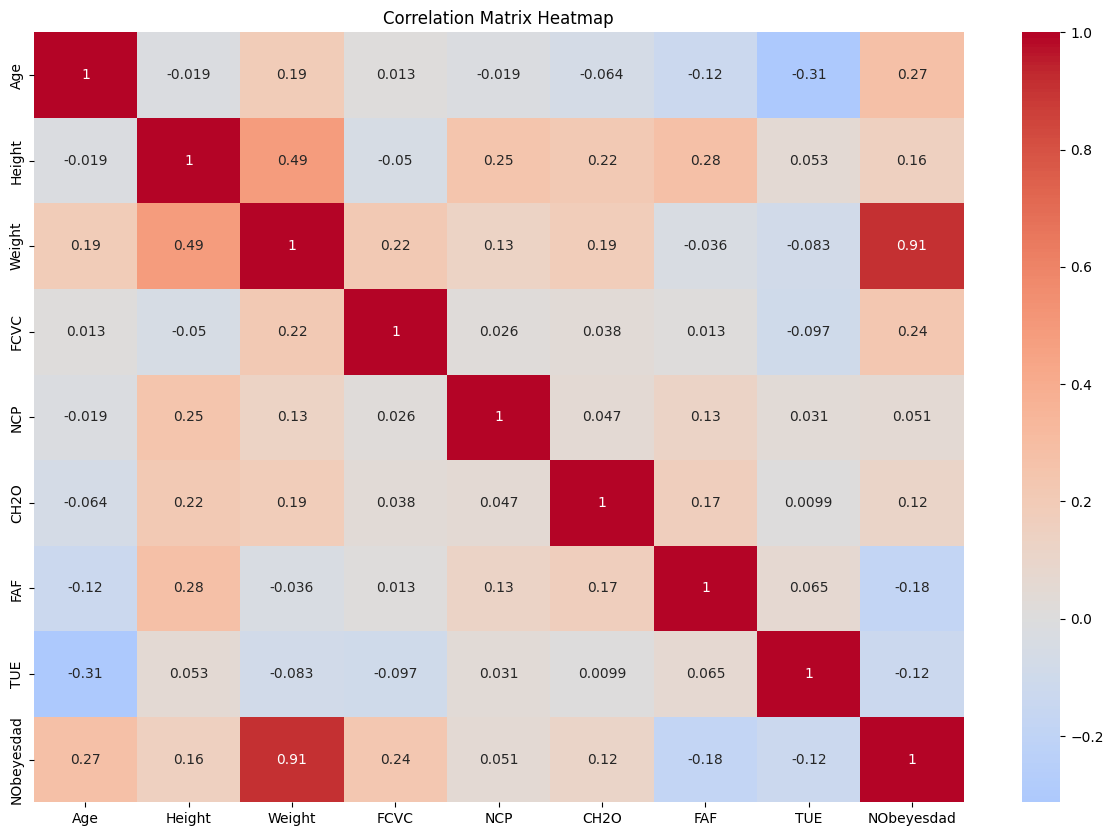

In [90]:
num_data = pd.concat([X_num, y_train], axis=1)
corr = num_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1.5.2. Standardize data
---

In [91]:
from sklearn.preprocessing import StandardScaler

def standardized_data(data):
  standardizer = StandardScaler()
  standardizer.fit(data)

  standardized_data_raw = standardizer.transform(data)
  standardized_data = pd.DataFrame(standardized_data_raw)
  standardized_data.columns = data.columns
  standardized_data.index = data.index

  return standardized_data, standardizer

In [92]:
X_train_clean, standardizer = standardized_data(data = X_train_concat)

In [93]:
X_train_clean.describe().round(4)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC
count,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,...,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000,1688.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,...,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,...,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-1.6236,-2.6384,-1.8152,-2.6592,-2.1192,-1.6271,-1.1813,-1.0860,-0.9929,-1.0071,...,-0.0645,-0.0772,-1.7266,-0.1674,-2.0878,-2.7199,-3.8721,-0.1497,-0.2230,-4.3494
25%,-0.6909,-0.7809,-0.7853,-0.7839,-0.0834,-0.7375,-1.0411,-1.0860,-0.9929,-1.0071,...,-0.0645,-0.0772,-1.7266,-0.1674,0.4790,0.3677,0.3057,-0.1497,-0.2230,-0.5045
50%,-0.2421,0.0009,-0.1378,-0.0864,0.4243,-0.0096,-0.0100,-0.0396,-0.9929,0.9929,...,-0.0645,-0.0772,0.5792,-0.1674,0.4790,0.3677,0.3057,-0.1497,-0.2230,-0.5045
75%,0.2581,0.7165,0.8168,1.0915,0.4243,0.7586,0.7707,0.5329,1.0071,0.9929,...,-0.0645,-0.0772,0.5792,-0.1674,0.4790,0.3677,0.3057,-0.1497,-0.2230,1.4179
max,5.7465,2.9570,3.2960,1.0915,1.6961,1.6080,2.3325,2.1518,1.0071,0.9929,...,15.4965,12.9538,0.5792,5.9746,0.4790,0.3677,2.3945,6.6799,4.4833,1.4179


##### 1.5.5. Function for preprocessing
---

In [94]:
def preprocessing(data, numerical_column, categorical_column, ohe_encoder, standardizer):

  ohe_cols = ['Gender', 'MTRANS']
  label_cols = ['family_history_with_overweight', 'FAVC', 'CAEC','SMOKE','SCC','CALC']
  num_data = data[numerical_column]
  ohe_data = data[ohe_cols]
  label_data = data[label_cols]

  # Encoding ohe categorical
  encoded_data = ohe_encoder.transform(ohe_data)
  categorical_columns = ohe_data.columns.tolist()
  ohe_data_encoded = pd.DataFrame(encoded_data, columns = ohe_encoder.get_feature_names_out(categorical_columns))
  ohe_data_encoded.index = ohe_data.index

  categories = {
    'family_history_with_overweight': ['no', 'yes'],
    'FAVC': ['no', 'yes'],
    'SMOKE': ['no', 'yes'],
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'SCC': ['no', 'yes'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always'],
  }

  # Encoding label categorical
  le_data_encoded = label_data.copy()
  for col in label_cols:
    le_encoder = LabelEncoder()
    le_encoder.fit(categories[col])
    le_data_encoded[col] = le_encoder.transform(le_data_encoded[col])

  # Gabungkan data
  concat_data = pd.concat([num_data,
                           ohe_data_encoded,
                            le_data_encoded],
                            axis = 1)

  # Standardize
  cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
  cleaned_data.columns = concat_data.columns

  return cleaned_data

In [95]:
X_test_cleaned = preprocessing(data = X_test,
                               numerical_column = numerical_col,
                               categorical_column = categorical_col,
                               ohe_encoder = ohe_encoder,
                               standardizer = standardizer)
print(X_test_cleaned.shape)
X_test_cleaned.head()

(212, 21)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC
0,-0.009826,0.121920,1.021619,1.091451,0.424314,1.279456,-0.733639,-0.814338,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,-0.504526
1,-0.405361,0.353372,1.866569,1.091451,0.424314,-0.841394,1.103106,0.321220,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,-0.504526
2,-0.996355,-1.160390,-1.777064,-0.783897,-2.119242,-1.627092,-1.181280,2.151785,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,-1.783210,-0.149702,-0.223050,1.417912
3,-0.866707,0.490967,1.798757,1.091451,0.424314,1.378926,0.510460,0.069623,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,-0.504526
4,-0.839544,0.000932,-0.861625,1.091451,0.424314,1.607988,2.332485,0.532908,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,2.394525,-0.149702,4.483302,1.417912


In [96]:
X_valid_cleaned = preprocessing(data = X_valid,
                               numerical_column = numerical_col,
                               categorical_column = categorical_col,
                               ohe_encoder = ohe_encoder,
                               standardizer = standardizer)
print(X_valid_cleaned.shape)
X_valid_cleaned.head()

(211, 21)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC
0,-0.839544,0.528805,-0.403905,1.091451,0.424314,-0.009552,2.332485,0.532908,-0.992916,0.992916,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,4.483302,-0.504526
1,-0.375394,-2.287040,-0.903801,-0.783897,-1.253367,-0.278654,-0.851131,-0.153742,1.007134,-1.007134,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,-2.719928,0.305658,-0.149702,-0.223050,1.417912
2,-0.996355,0.086521,-1.345486,-2.089369,0.424314,-0.405045,-1.107570,1.621654,-0.992916,0.992916,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,-0.504526
3,0.239902,0.709095,1.050619,-0.360573,0.424314,0.240076,0.302543,-0.454319,-0.992916,0.992916,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,-0.504526
4,-1.144868,0.113010,0.506204,-0.783897,0.424314,-0.009552,-1.102231,0.361477,-0.992916,0.992916,...,-0.064531,-0.077198,0.579174,-0.167376,0.478983,0.367657,0.305658,-0.149702,-0.223050,1.417912


### 2. Modelling
---

```
2.1. Define metrics
2.2. Define baseline model
2.3. Train and evaluate several model
2.4. Hyperparameter tuning
2.5. Define best model
```

#### 2.1. Define metrics
---

Metrics yang akan digunakan :
1.  Akurasi
    -  Metrik paling dasar, menunjukkan persentase prediksi model yang benar.
    -  Mudah diinterpretasikan, namun tidak mempertimbangkan kelas minoritas dan tidak membedakan antara positif benar dan positif palsu.
2.  Recall
    -  Mengukur kemampuan model mengidentifikasi orang yang diprediksi benar obesitas dari keseluruhan data yang benar obesitas (true positive / (true positive + false negative)).
    - Recall mempertimbangkan False negative dalam proses evaluasi
    - Metric recall penting untuk melihat orang yang sebenarnya mengalami obesitas, tetapi hasil prediksinya menunjukkan orang itu tidak mengalami obesitas. Tentunya kasus seperti ini akan diminimalkan karena kita ingin orang mengalami obesitas mendapatkan treatment secepat mungkin
3.  Precision
    -  Mengukur proporsi prediksi yang benar obesitas dari keseluruhan hasil yang diprediksi.
    -  Precision mempertimbangkan False Positive dalam proses evaluasi
    -  Metric precision penting untuk melihat orang yang sebenarnya tidak mengalami obesitas, tetapi hasil prediksinya menunjukkan orang itu mengalami obesitas. Tentunya jika kasus seperti terjadi, maka orang yang sebenarnya normal tetapi diprediksi mengalami obesitas dan diberi treatment seperti obat-obatan, maka tubuh orang itu mengkonsumsi obat yang seharusnya tidak dikonsumsi bahkan bisa berakibat fatal.
4.  F1 Score
    -  Rata-rata harmonic dari presisi dan recall.
    -  Berguna ketika ingin menyeimbangkan kedua metrik.
    -  F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik

Dalam percobaan ini, saya ingin memastikan bahwa model dapat menangkap hasil precision dan recall semaksimal mungkin. F1-score mengatur trade-off ini.
Namun, masalah utama dengan skor F1 adalah skornya memberi bobot yang sama terhadap precision dan recall. oleh karena itu, disini saya menambahkan average = 'weighted' agar setiap value pada target memiliki bobot yang berbeda tergantung dari jumlah kemunculan masing masing value.

#### 2.2. Define baseline model
---

In [97]:
def extract_cv_results(cv_obj):
    train_cv_score = (np.mean(cv_obj.cv_results_['mean_train_score']))
    valid_cv_score = (cv_obj.best_score_)
    best_params = cv_obj.best_params_
    return train_cv_score, valid_cv_score, best_params

In [98]:
base = GridSearchCV(estimator=DummyClassifier(),
                    param_grid={},
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

base.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DummyClassifier(), param_grid={},
             return_train_score=True, scoring='accuracy')

In [99]:
# Validate the CV Score
train_base, valid_base, best_param_base = extract_cv_results(base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.16587679907887162
Valid score - Baseline model: 0.16587712675363897
Best Params - Baseline model: {}


#### 2.3.Train and evaluate several model
---

In [100]:
models = [
          LogisticRegression(max_iter=150),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(n_estimators=100, random_state=42),
          AdaBoostClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),]

train_acc = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for model in models:
    model.fit(X_train_clean, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train_clean))
    test_accuracy = accuracy_score(y_valid, model.predict(X_valid_cleaned))
    precision = precision_score(y_valid, model.predict(X_valid_cleaned), average='weighted')
    recall = recall_score(y_valid, model.predict(X_valid_cleaned), average='weighted')
    f1 = f1_score(y_valid, model.predict(X_valid_cleaned), average='weighted')
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1.append(f1)

summary_df = pd.DataFrame(
    data={
        'model': ['Logreg', 'Decision Tree',  'Random Forest', 'Adaboost', 'Gradient Boost'],
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }
)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

summary_df_styled = summary_df.style.apply(highlight_max, subset=['train_accuracy', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
summary_df_styled

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,train_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,Logreg,0.892180,0.886256,0.893700,0.886256,0.886047
1,Decision Tree,1.000000,0.919431,0.925805,0.919431,0.919718
2,Random Forest,1.000000,0.957346,0.961666,0.957346,0.957872
3,Adaboost,0.307464,0.293839,0.241958,0.293839,0.216221
4,Gradient Boost,0.998815,0.966825,0.968040,0.966825,0.966590


-  Berikut ini penjelasan mengenai metric diatas :
  -  **Logreg** : secara keseluruhan, model logistic regression cukup baik dalam melakukan klasifikasi pada data training yaitu dengan akurasi sebesar `89.2%` dan dan untuk data test sebesar `88.6%`, model ini tidak terlihat overfit. Sementara untuk precison sebesar `89.3%`. Untuk recall sebesar `88.6.2%`. F1 score nya mendapatkan nilai `88.6%` yang artinya model memiliki precision dan recall yang cukup baik dan seimbang.

  -  **Decison tree** : secara keseluruhan, model decision tree sangat baik dalam melakukan klasifikasi pada data training yaitu dengan akurasi sebesar `100%` dan dan untuk data test sebesar `91.9%`. Model ini cenderung overfit. Sementara itu untuk precison sebesar `92.5%`. Untuk recall sebesar `91.9%`. F1 score nya mendapatkan nilai `91.9%` yang artinya model memiliki precision dan recall yang cukup baik dan seimbang.

  -  **Random Forest** : secara keseluruhan, model random forest sangat baik dalam melakukan klasifikasi pada data training yaitu dengan akurasi sebesar `100%` dan dan untuk data test sebesar `95.7%`. Model ini memiliki akurasi paling tinggi bersama decion tree pada data test diantara model yang lain. Sementara untuk precison sebesar `96.1%`. Untuk recall sebesar `95.1%`. F1 score nya mendapatkan nilai `95.7%` yang artinya model memiliki precision dan recall yang cukup baik dan seimbang.

  -  **Adaboost** : secara keseluruhan, model adaboost adalah model yang paling buruk dalam melakukan klasifikasi pada data training yaitu dengan akurasi sebesar `30.7%` dan dan untuk data test sebesar `29.3%`. Sementara untuk precison sebesar `24.1%`. Untuk recall sebesar `29.3%`.

  -  **Gradient Boost** : secara keseluruhan, model gradient boost sangat baik dalam melakukan klasifikasi pada data training yaitu dengan akurasi sebesar `99.8%` dan dan untuk data test sebesar `96.6%`. Sementara untuk precison sebesar `96.6%`. Untuk recall sebesar `96.8%`. F1 score nya mendapatkan nilai `96.6%` yang artinya model memiliki precision dan recall yang cukup baik dan seimbang.

Berdasarkan Penjelasan metric diatas, model yang dipilih untuk hyperparameter tuning adalah model Gradient boost. Model ini dipilih karena memiliki akuras, precision, recall, dan f1 score paling tinggi pada data test

#### 2.4.Hyperparameter tuning
---

-  Logistic Regression

In [101]:
# Hyperparameter Tuning Logreg
logreg_param = {'C': [0.001, 0.01, 0.1, 10, 100],
                'multi_class': ['multinomial']}

logreg_classifier = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid=logreg_param,
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

logreg_classifier.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100],
                         'multi_class': ['multinomial']},
             return_train_score=True, scoring='accuracy')

In [102]:
# Validate the CV Score Logreg
train_logreg, valid_logreg, best_param_logreg = extract_cv_results(logreg_classifier)

print(f'Train score - Logreg model: {train_logreg}')
print(f'Valid score - logreg model: {valid_logreg}')
print(f'Best Params - logreg model: {best_param_logreg}')

Train score - Logreg model: 0.7865828878471366
Valid score - logreg model: 0.9520253542394606
Best Params - logreg model: {'C': 100, 'multi_class': 'multinomial'}


-  Decison Tree

In [103]:
# Hyperparameter Tuning Decision tree
dt_param = {'max_depth': [5, 8, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [2, 5, 10]}

dt_classifier = GridSearchCV(estimator= DecisionTreeClassifier(random_state=42),
                    param_grid=dt_param,
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

dt_classifier.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 15],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [104]:
# Validate the CV Score Decision Tree
train_dt, valid_dt, best_param_dt = extract_cv_results(dt_classifier)

print(f'Train score - DT model: {train_dt}')
print(f'Valid score - DT model: {valid_dt}')
print(f'Best Params - DT model: {best_param_dt}')

Train score - DT model: 0.9122231989919571
Valid score - DT model: 0.9176496409319965
Best Params - DT model: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


-  Random Forest

In [105]:
# Hyperparameter Tuning Random Forest
rf_param = {'max_depth': [5, 8, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [2, 5, 10]}

rf_classifier = GridSearchCV(estimator= RandomForestClassifier(random_state=42),
                    param_grid=rf_param,
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

rf_classifier.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 15],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [106]:
# Validate the CV Score Random Forest
train_rf, valid_rf, best_param_rf = extract_cv_results(rf_classifier)

print(f'Train score - RF model: {train_rf}')
print(f'Valid score - RF model: {valid_rf}')
print(f'Best Params - RF model: {best_param_rf}')

Train score - RF model: 0.9446356801190804
Valid score - RF model: 0.938396572612505
Best Params - RF model: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


-  Adaboost

In [107]:
# Hyperparameter Tuning adaboost
ab_param = {'n_estimators': [150, 300, 500],
             'learning_rate': [0.001, 0.1, 10]}

ab_classifier = GridSearchCV(estimator= AdaBoostClassifier(random_state=42),
                    param_grid=ab_param,
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

ab_classifier.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.1, 10],
                         'n_estimators': [150, 300, 500]},
             return_train_score=True, scoring='accuracy')

In [108]:
# Validate the CV Score Decision Tree
train_ab, valid_ab, best_param_ab = extract_cv_results(ab_classifier)

print(f'Train score - AB model: {train_ab}')
print(f'Valid score - AB model: {valid_ab}')
print(f'Best Params - AB model: {best_param_ab}')

Train score - AB model: 0.3283338603016208
Valid score - AB model: 0.4022685372148965
Best Params - AB model: {'learning_rate': 0.001, 'n_estimators': 300}


-  Gradient Boosting

In [109]:
# Hyperparameter Tuning Gradient Boosting
gb_param = {'max_depth': [4, 8, 10],
             'min_samples_split': [ 2, 10, 20],
             'min_samples_leaf': [2, 5, 10]}

gb_classifier = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                    param_grid=gb_param,
                    cv=5,
                    scoring = 'accuracy',
                    return_train_score=True
                    )

gb_classifier.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [4, 8, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             return_train_score=True, scoring='accuracy')

In [111]:
# Validate the CV Score Decision Tree
train_gb, valid_gb, best_param_gb = extract_cv_results(gb_classifier)

print(f'Train score - GB model: {train_gb}')
print(f'Valid score - GB model: {valid_gb}')
print(f'Best Params - GB model: {best_param_gb}')

Train score - GB model: 1.0
Valid score - GB model: 0.9680139764367108
Best Params - GB model: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [113]:
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'Logreg', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost'],
        'train_score': [train_base, train_logreg, train_dt, train_rf, train_ab, train_gb],
        'valid_score': [valid_base, valid_logreg, valid_dt, valid_dt, valid_ab, valid_gb],
        'best_params': [best_param_base, best_param_logreg, best_param_dt, best_param_rf, best_param_ab, best_param_gb]
    }
)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]

summary_df_styled = summary_df.style.apply(highlight_max, subset=['valid_score'])
summary_df_styled

,model,train_score,valid_score,best_params
0,Baseline,0.165877,0.165877,{}
1,Logreg,0.786583,0.952025,"{'C': 100, 'multi_class': 'multinomial'}"
2,Decision Tree,0.912223,0.917650,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}"
3,Random Forest,0.944636,0.917650,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}"
4,AdaBoost,0.328334,0.402269,"{'learning_rate': 0.001, 'n_estimators': 300}"
5,Gradient Boost,1.000000,0.968014,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}"


-  Jika dibandingkan dengan model baseline, performa gradient boost masih lebih baik dengan nilai accuracy mencapai `96%` setelah dilakukan proses hyperparameter tuning dibandingkan dengan baseline yaitu sekitar `16%`.

#### 2.5. Define best model
---

In [ ]:
best_model = GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10)
best_model.fit(X_train_clean, y_train)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=2,
                           min_samples_split=10)

**EVALUATE VALIDATION DATA WITH BEST MODEL (GRADIENT BOOST)**

In [ ]:
def evaluate_model_performance(model, X, y):
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print("Classification Report:")
    print(classification_report(y, y_pred))

    return accuracy, precision, recall, f1

In [ ]:
accuracy_valid_best, precision_valid_best, recall_valid_best, f1_valid_best = evaluate_model_performance(best_model, X_valid_cleaned, y_valid)
print(f'accuracy valid data: {accuracy_valid_best}')
print(f'precision valid data: {precision_valid_best}')
print(f'recall valid data: {recall_valid_best}')
print(f'f1 valid data: {f1_valid_best}')

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       0.96      1.00      0.98        26
           3       1.00      0.96      0.98        25
           4       0.97      1.00      0.98        30
           5       1.00      0.97      0.99        40
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        29

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

accuracy valid data: 0.990521327014218
precision valid data: 0.9908497398177876
recall valid data: 0.990521327014218
f1 valid data: 0.9905265283792366


### 3. Model Evaluation
---

#### 3.1. How does best model perform?
---

In [ ]:
accuracy_test_best, precision_test_best, recall_test_best, f1_test_best = evaluate_model_performance(best_model, X_test_cleaned, y_test)
print(f'accuracy valid data: {accuracy_test_best}')
print(f'precision valid data: {precision_test_best}')
print(f'recall valid data: {recall_test_best}')
print(f'f1 valid data: {f1_test_best}')

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.97      0.97      0.97        32
           3       1.00      0.96      0.98        23
           4       0.92      0.96      0.94        25
           5       0.97      0.97      0.97        31
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        42

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212

accuracy valid data: 0.9811320754716981
precision valid data: 0.9814949201741655
recall valid data: 0.9811320754716981
f1 valid data: 0.9812183993094092


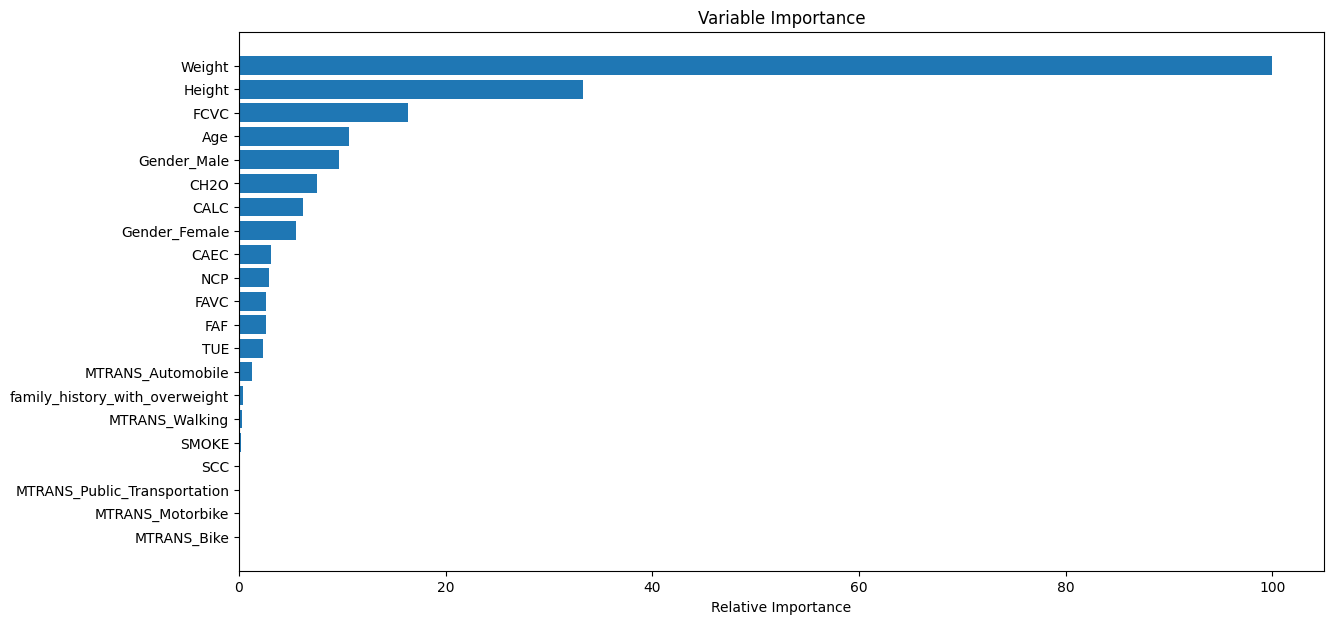

In [ ]:
feature_importance = best_model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(14, 7))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_clean.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

-  Dari fitur importance diatas, tentunya berat badan, tinggi badan masih menjadi fitur terpenting dalam menentukan tingkat obesitas seseorang